# Assingment-1

Write a Python program that reads an audio file and extracts key sound features such as intensity (loudness) and pitch (fundamental frequency). Then plot these features as functions of time to analyze how they vary throughout the audio.

Loading   Ref: https://librosa.org/doc/main/generated/librosa.feature.rms.html

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load('filename.wav')
rms=librosa.feature.rms(y=y)


Intensity/loudness

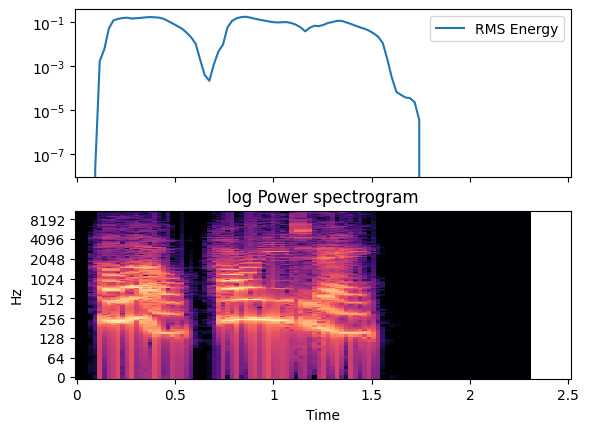

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
librosa.feature.rms(S=S)
plt.show()

F0 Ref: https://librosa.org/doc/main/generated/librosa.pyin.html

In [ ]:
f0, voiced_flag, voiced_probs = librosa.pyin(y,
                                             sr=sr,
                                             fmin=librosa.note_to_hz('C2'),
                                             fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0, sr=sr)

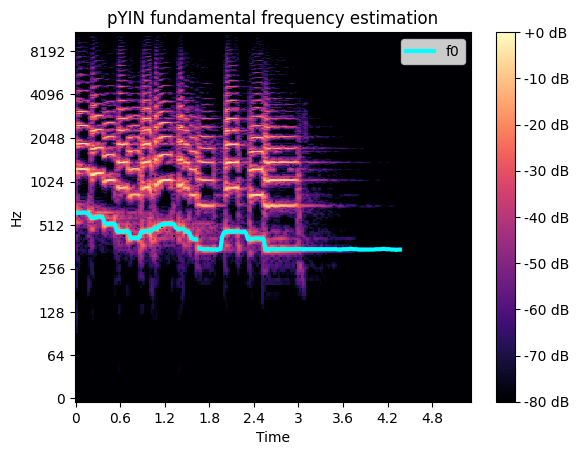

In [ ]:
import matplotlib.pyplot as plt
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

# Assingment-2

Write python program to perform the following tasks:

- Record or use given speech audio samples
- Compute the frequency spectrum of the speech signals using the Fast Fourier Transform (FFT)
- Plot the frequency spectrum as well as the original waveform along with the sinusoidal components
- Identify and discuss dominant frequencies and fundamental frequency (F0) for different spoken words or phonemes
- Generate spectrograms by applying Short-Time Fourier Transform (STFT) on speech signals
- Plot the spectrogram along with the spoken words (each word is written under each block in spectrogram)
- Plot and interpret spectrograms and discuss formant patterns and phoneme distinctions
- Explore different window sizes and overlaps and analyze their effect on time-frequency resolution

waveshow Ref: https://librosa.org/doc/main/generated/librosa.display.waveshow.html

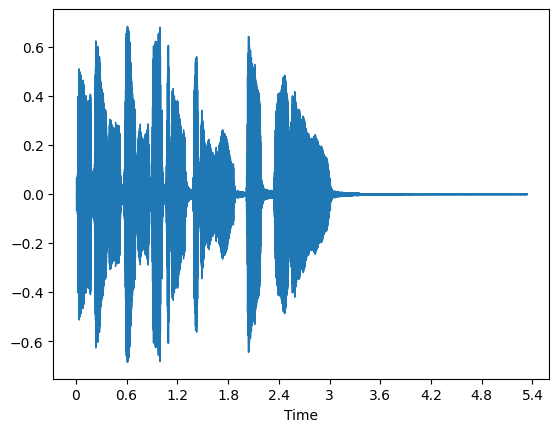

In [ ]:
import matplotlib.pyplot as plt
librosa.display.waveshow(y, sr=sr)


FFT

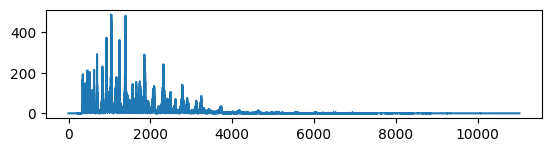

In [ ]:
Y = np.abs(np.fft.rfft(y))
freqs = np.fft.rfftfreq(len(y), 1/sr)
plt.subplot(3,1,2)
plt.plot(freqs, Y)

Power spectrogram STFT Ref: https://librosa.org/doc/main/generated/librosa.stft.html

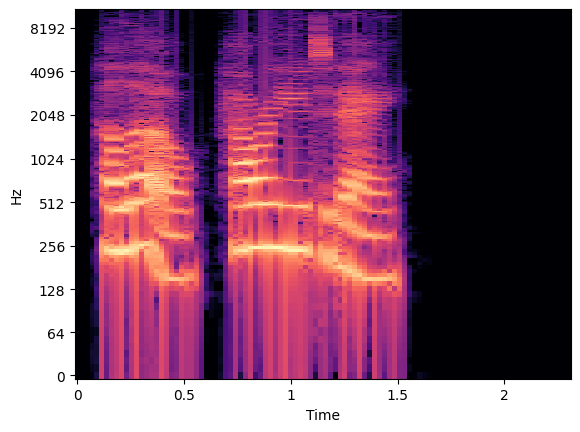

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

# Assignment-3

- Load male and female speech
- Compute Mel spectrograms
- Plot Mel filter bank
- Plot Mel spectrograms

In [ ]:
male, sr = librosa.load("hello male wav.wav", sr=16000)
female, _ = librosa.load("hello female wav.wav", sr=sr)

Compute Mel spectrograms Ref: https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html     and powerdp: https://librosa.org/doc/main/generated/librosa.power_to_db.html

In [ ]:
S_m = librosa.feature.melspectrogram(y=male, sr=sr, n_mels=64)
S_f = librosa.feature.melspectrogram(y=female, sr=sr, n_mels=64)
Sdb_m, Sdb_f = librosa.power_to_db(S_m), librosa.power_to_db(S_f)


Plot Mel filter bank Ref: https://librosa.org/doc/main/generated/librosa.filters.mel.html

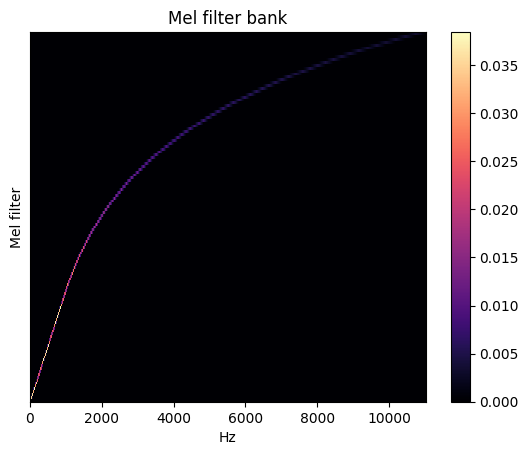

In [ ]:
melfb = librosa.filters.mel(sr=22050, n_fft=2048)
librosa.filters.mel(sr=22050, n_fft=2048, fmax=800)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(melfb, x_axis='linear', ax=ax)
ax.set(ylabel='Mel filter', title='Mel filter bank')
fig.colorbar(img, ax=ax)

Plot Mel spectrograms

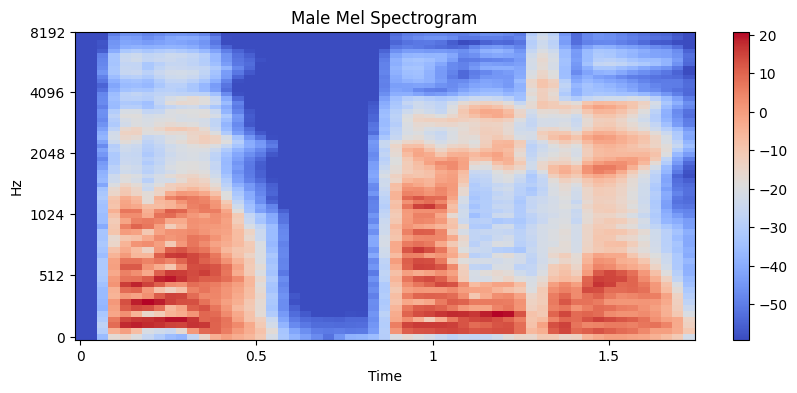

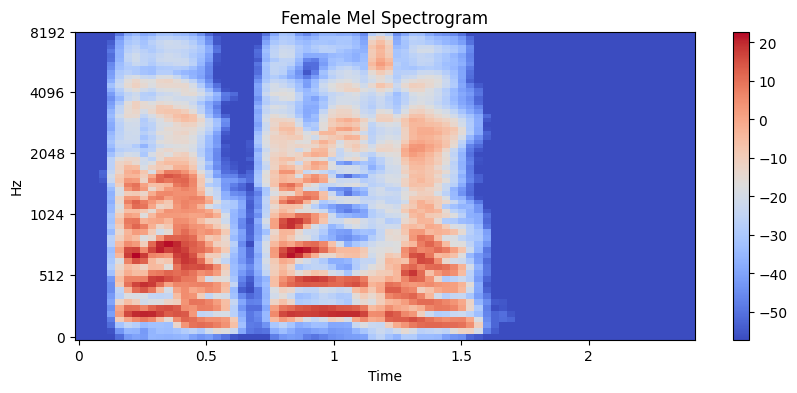

In [ ]:
plt.figure(figsize=(10,4))
librosa.display.specshow(Sdb_m, sr=sr, x_axis='time', y_axis='mel')
plt.title("Male Mel Spectrogram"); plt.colorbar(); plt.show()

plt.figure(figsize=(10,4))
librosa.display.specshow(Sdb_f, sr=sr, x_axis='time', y_axis='mel')
plt.title("Female Mel Spectrogram"); plt.colorbar(); plt.show()